In [2]:
import pandas as pd
Inflows = pd.read_parquet("/uss/hdsi-prismdata/q1-ucsd-inflows.pqt")
Outflows = pd.read_parquet("/uss/hdsi-prismdata/q1-ucsd-outflows.pqt")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
Outflows['amount'] = -1 * Outflows['amount']

In [5]:
Outflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,-900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,-80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,-18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,-634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,-26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,-8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,-2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,-262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,-10.00,2023-01-25,ATM_CASH


In [6]:
Cash_Flows = pd.concat([Outflows, Inflows])

In [7]:
testing = Cash_Flows.set_index("prism_consumer_id")

In [8]:
train, test = train_test_split(testing, test_size=0.25)

In [9]:
test

,prism_account_id,memo,amount,posted_date,category
prism_consumer_id,,,,,
2972,acc_6555,WEST AVE CHICKEN,-28.82,2022-07-16,FOOD_AND_BEVERAGES
5941,acc_9524,POS WITHDRAWALCIRCLE K # XXXXX PHOENIX AZ Car...,-45.60,2022-07-09,FOOD_AND_BEVERAGES
2909,acc_6492,PURCHASE AUTHORIZED ON 05/06 CASH APP*ALICIA D...,-36.00,2022-05-09,GENERAL_MERCHANDISE
5587,acc_9170,EXTERNAL_TRANSFER,910.78,2022-05-06,EXTERNAL_TRANSFER
160,acc_468,GIFTS_DONATIONS,-365.00,2021-06-28,GIFTS_DONATIONS
...,...,...,...,...,...
4771,acc_8354,MISCELLANEOUS,45.00,2022-04-01,MISCELLANEOUS
1316,acc_3681,UNCATEGORIZED,-400.00,2021-11-04,UNCATEGORIZED
4501,acc_8084,MARINA WI XXXX 06/17 #XXXXXXXXX MOBILE PURCHAS...,-14.11,2022-06-17,FOOD_AND_BEVERAGES


In [10]:
ids = list(set(testing.index))

In [11]:
import pandas as pd

topN = (
    Outflows.groupby("category")["memo"]
    .value_counts()                          # counts per (category, memo)
    .groupby(level=0, group_keys=False)
    .head(15)                                # top 15 per category
    .rename("count")
    .reset_index()
)

# optional rank within each category
topN["rank"] = topN.groupby("category")["count"].rank("first", ascending=False).astype(int)
topN = topN.sort_values(["category", "rank"])

In [12]:
(Outflows[Outflows['category'] == 'UNCATEGORIZED'].shape[0]) / Outflows.shape[0]

0.04520097879181732

In [13]:
example = Outflows[Outflows['category'] == 'UNCATEGORIZED'].groupby('prism_account_id').count().sort_values(by = 'memo', ascending = False).head(1000)

In [15]:
example["prism_consumer_id"] /= (Outflows[Outflows['category'] == 'UNCATEGORIZED'].shape[0])

In [16]:
example

,prism_consumer_id,memo,amount,posted_date,category
prism_account_id,,,,,
acc_3499,0.005928,696,696,696,696
acc_7806,0.005110,600,600,600,600
acc_9332,0.005093,598,598,598,598
acc_8960,0.004403,517,517,517,517
acc_8709,0.004225,496,496,496,496
...,...,...,...,...,...
acc_7611,0.000298,35,35,35,35
acc_5325,0.000298,35,35,35,35
acc_7867,0.000298,35,35,35,35


In [12]:
in_cat = list(Inflows["category"].value_counts().index)
inside = Inflows[["category", "memo"]].value_counts()
output_inflow = {}
for i in in_cat:
    output_inflow[i] = list(inside[i].head(15).index)

In [13]:
output_inflow

{'EXTERNAL_TRANSFER': ['EXTERNAL_TRANSFER'],
 'SELF_TRANSFER': ['SELF_TRANSFER'],
 'DEPOSIT': ['DEPOSIT'],
 'MISCELLANEOUS': ['MISCELLANEOUS'],
 'PAYCHECK': ['PAYCHECK'],
 'PAYCHECK_PLACEHOLDER': ['PAYCHECK_PLACEHOLDER'],
 'REFUND': ['REFUND'],
 'INVESTMENT_INCOME': ['INVESTMENT_INCOME'],
 'SMALL_DOLLAR_ADVANCE': ['SMALL_DOLLAR_ADVANCE'],
 'OTHER_BENEFITS': ['OTHER_BENEFITS'],
 'TAX': ['TAX'],
 'LOAN': ['LOAN'],
 'UNEMPLOYMENT_BENEFITS': ['UNEMPLOYMENT_BENEFITS'],
 'INSURANCE': ['INSURANCE']}

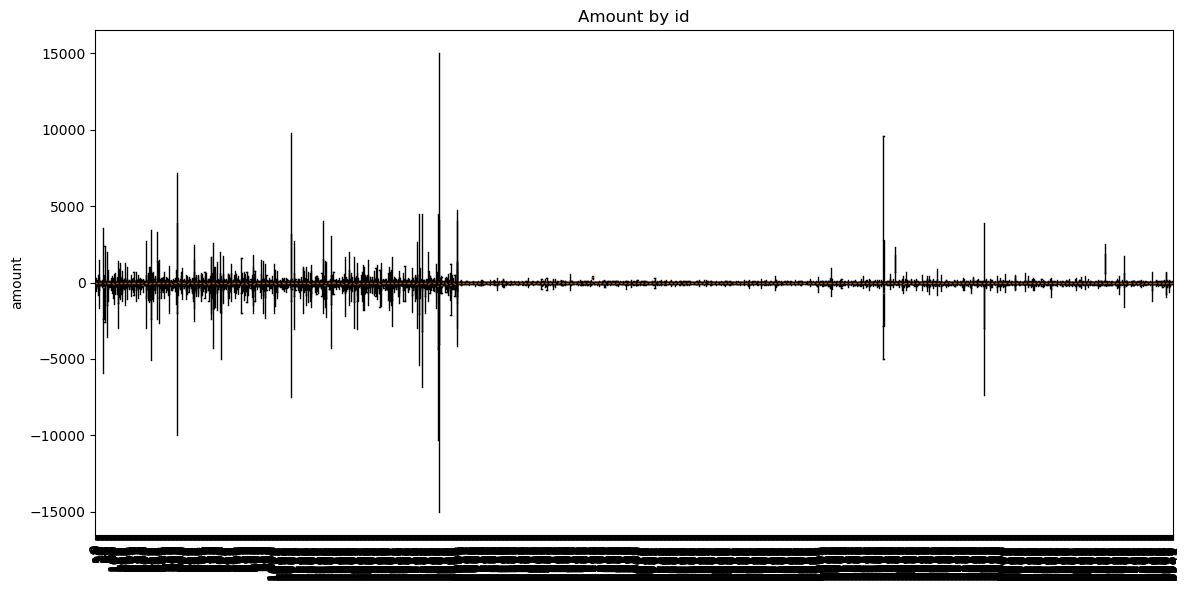

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# if ids are index values:
data = [testing.loc[i, 'amount'] for i in ids]
plt.boxplot(data, showfliers=False)
plt.xticks(range(1, len(ids)+1), ids, rotation=90)
plt.ylabel('amount')
plt.title('Amount by id')
plt.tight_layout()
plt.show()
